## 1 条件表达式
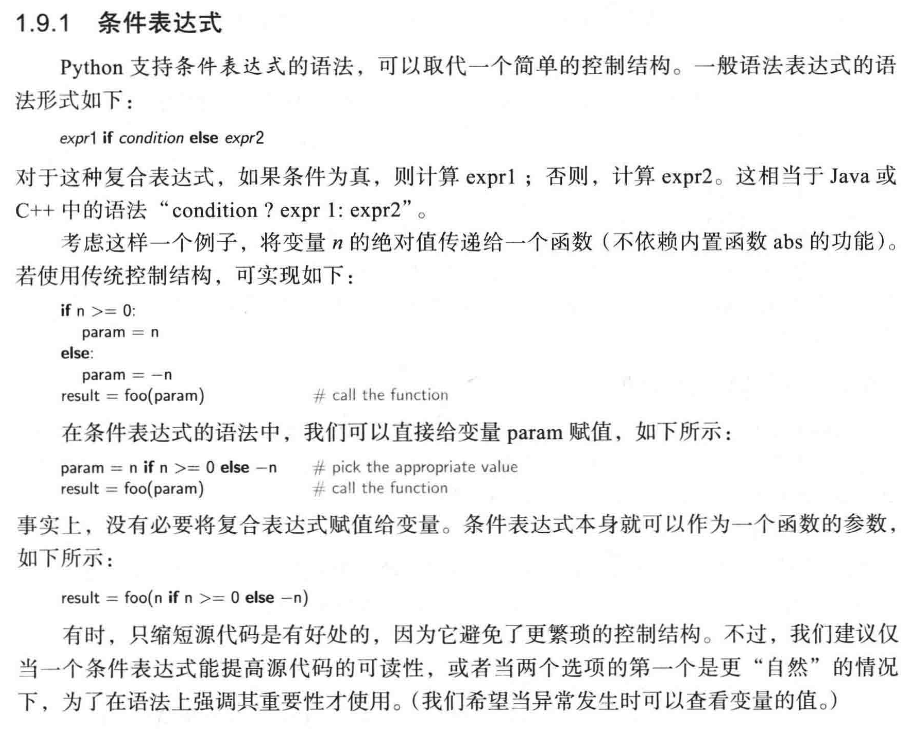

In [1]:
age = 6  # 用户年龄

is_legal_to_buy_alcohol = True if age >= 21 else False
print("Please, sir!" if is_legal_to_buy_alcohol else "Go back home and drinke your mother's milk, kid!")

Go back home and drinke your mother's milk, kid!


## 2 生成器表达式

In [2]:
def classifier(d: int | list) -> int | list[int]:
    def single_number(score: int) -> int:
        score_range_class = {
            (86, 100): 0,
            (70, 85): 1,
            (60, 69): 2,
            (0, 59): 3,
        }
        return next(
            # 生成器表达式
            (
                value
                for range_, value in score_range_class.items()
                if range_[0] <= score <= range_[1]
            ),
            3,#如果生成器没有值时返回的默认值
        )

    if isinstance(d, (int, float)):
        return single_number(d)
    elif isinstance(d, list):
        return [single_number(i) for i in d]
    else:
        raise TypeError("Unsupported type")


grades = {0: "very good", 1: "good", 2: "pass", 3: "failed"}

test_list = [59, 60, 70, 71, 85, 88, 100]
# Test individual values
for score in test_list:
    print(grades.get(classifier(score)), score)  # type: ignore

# Test a list of values
result_list = classifier(test_list)
print(list(zip([grades.get(i) for i in result_list], test_list)))  # type: ignore

failed 59
pass 60
good 70
good 71
good 85
very good 88
very good 100
[('failed', 59), ('pass', 60), ('good', 70), ('good', 71), ('good', 85), ('very good', 88), ('very good', 100)]


生成器表达式是一种紧凑的语法形式，用于创建生成器对象。其基本结构类似于列表推导式，但使用圆括号而不是方括号。生成器表达式的语法如下：

```python
(generator_expression)
```

在你提到的代码中，生成器表达式的结构是：

```python
(value for range_, value in score_range_class.items() if range_[0] <= score <= range_[1])
```

这里解释一下生成器表达式的不同部分：

- `(value ...)`：圆括号表示这是一个生成器表达式。
- `for range_, value in score_range_class.items()`：这是一个迭代部分，遍历字典 `score_range_class` 的键值对。
- `if range_[0] <= score <= range_[1]`：这是一个条件过滤器，只有当 `score` 在 `range_[0]` 和 `range_[1]` 之间时才包含对应的值。

生成器表达式的执行方式类似于迭代器，它一次生成一个值而不是一次生成所有值。这使得生成器表达式对于处理大量数据或需要延迟计算的情况非常有用，因为它不会一次性生成所有的值，而是按需生成，节省内存。

与列表推导式相比，生成器表达式的语法更加简洁，因为它不会在内存中创建一个完整的列表。

In [3]:
a = [3, 4, 5, 6, 7, 8]
print(next((i for i in a if i > 9), False))
print((i for i in a if i > 9))

False
<generator object <genexpr> at 0x000001AEDA9B7840>
